In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.shape

(301, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data.describe(include = 'O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


plt.figure(figsize=(30,40), facecolor='Blue')
plotnumber = 1

for columns in data:
    if plotnumber<=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(data[columns].dropna(axis=0),hue=data.Year)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Selling_Price',fontsize = 20)
        

In [10]:
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
#print(data['Car_Name'].unique())
print(data['Fuel_Type'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [14]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

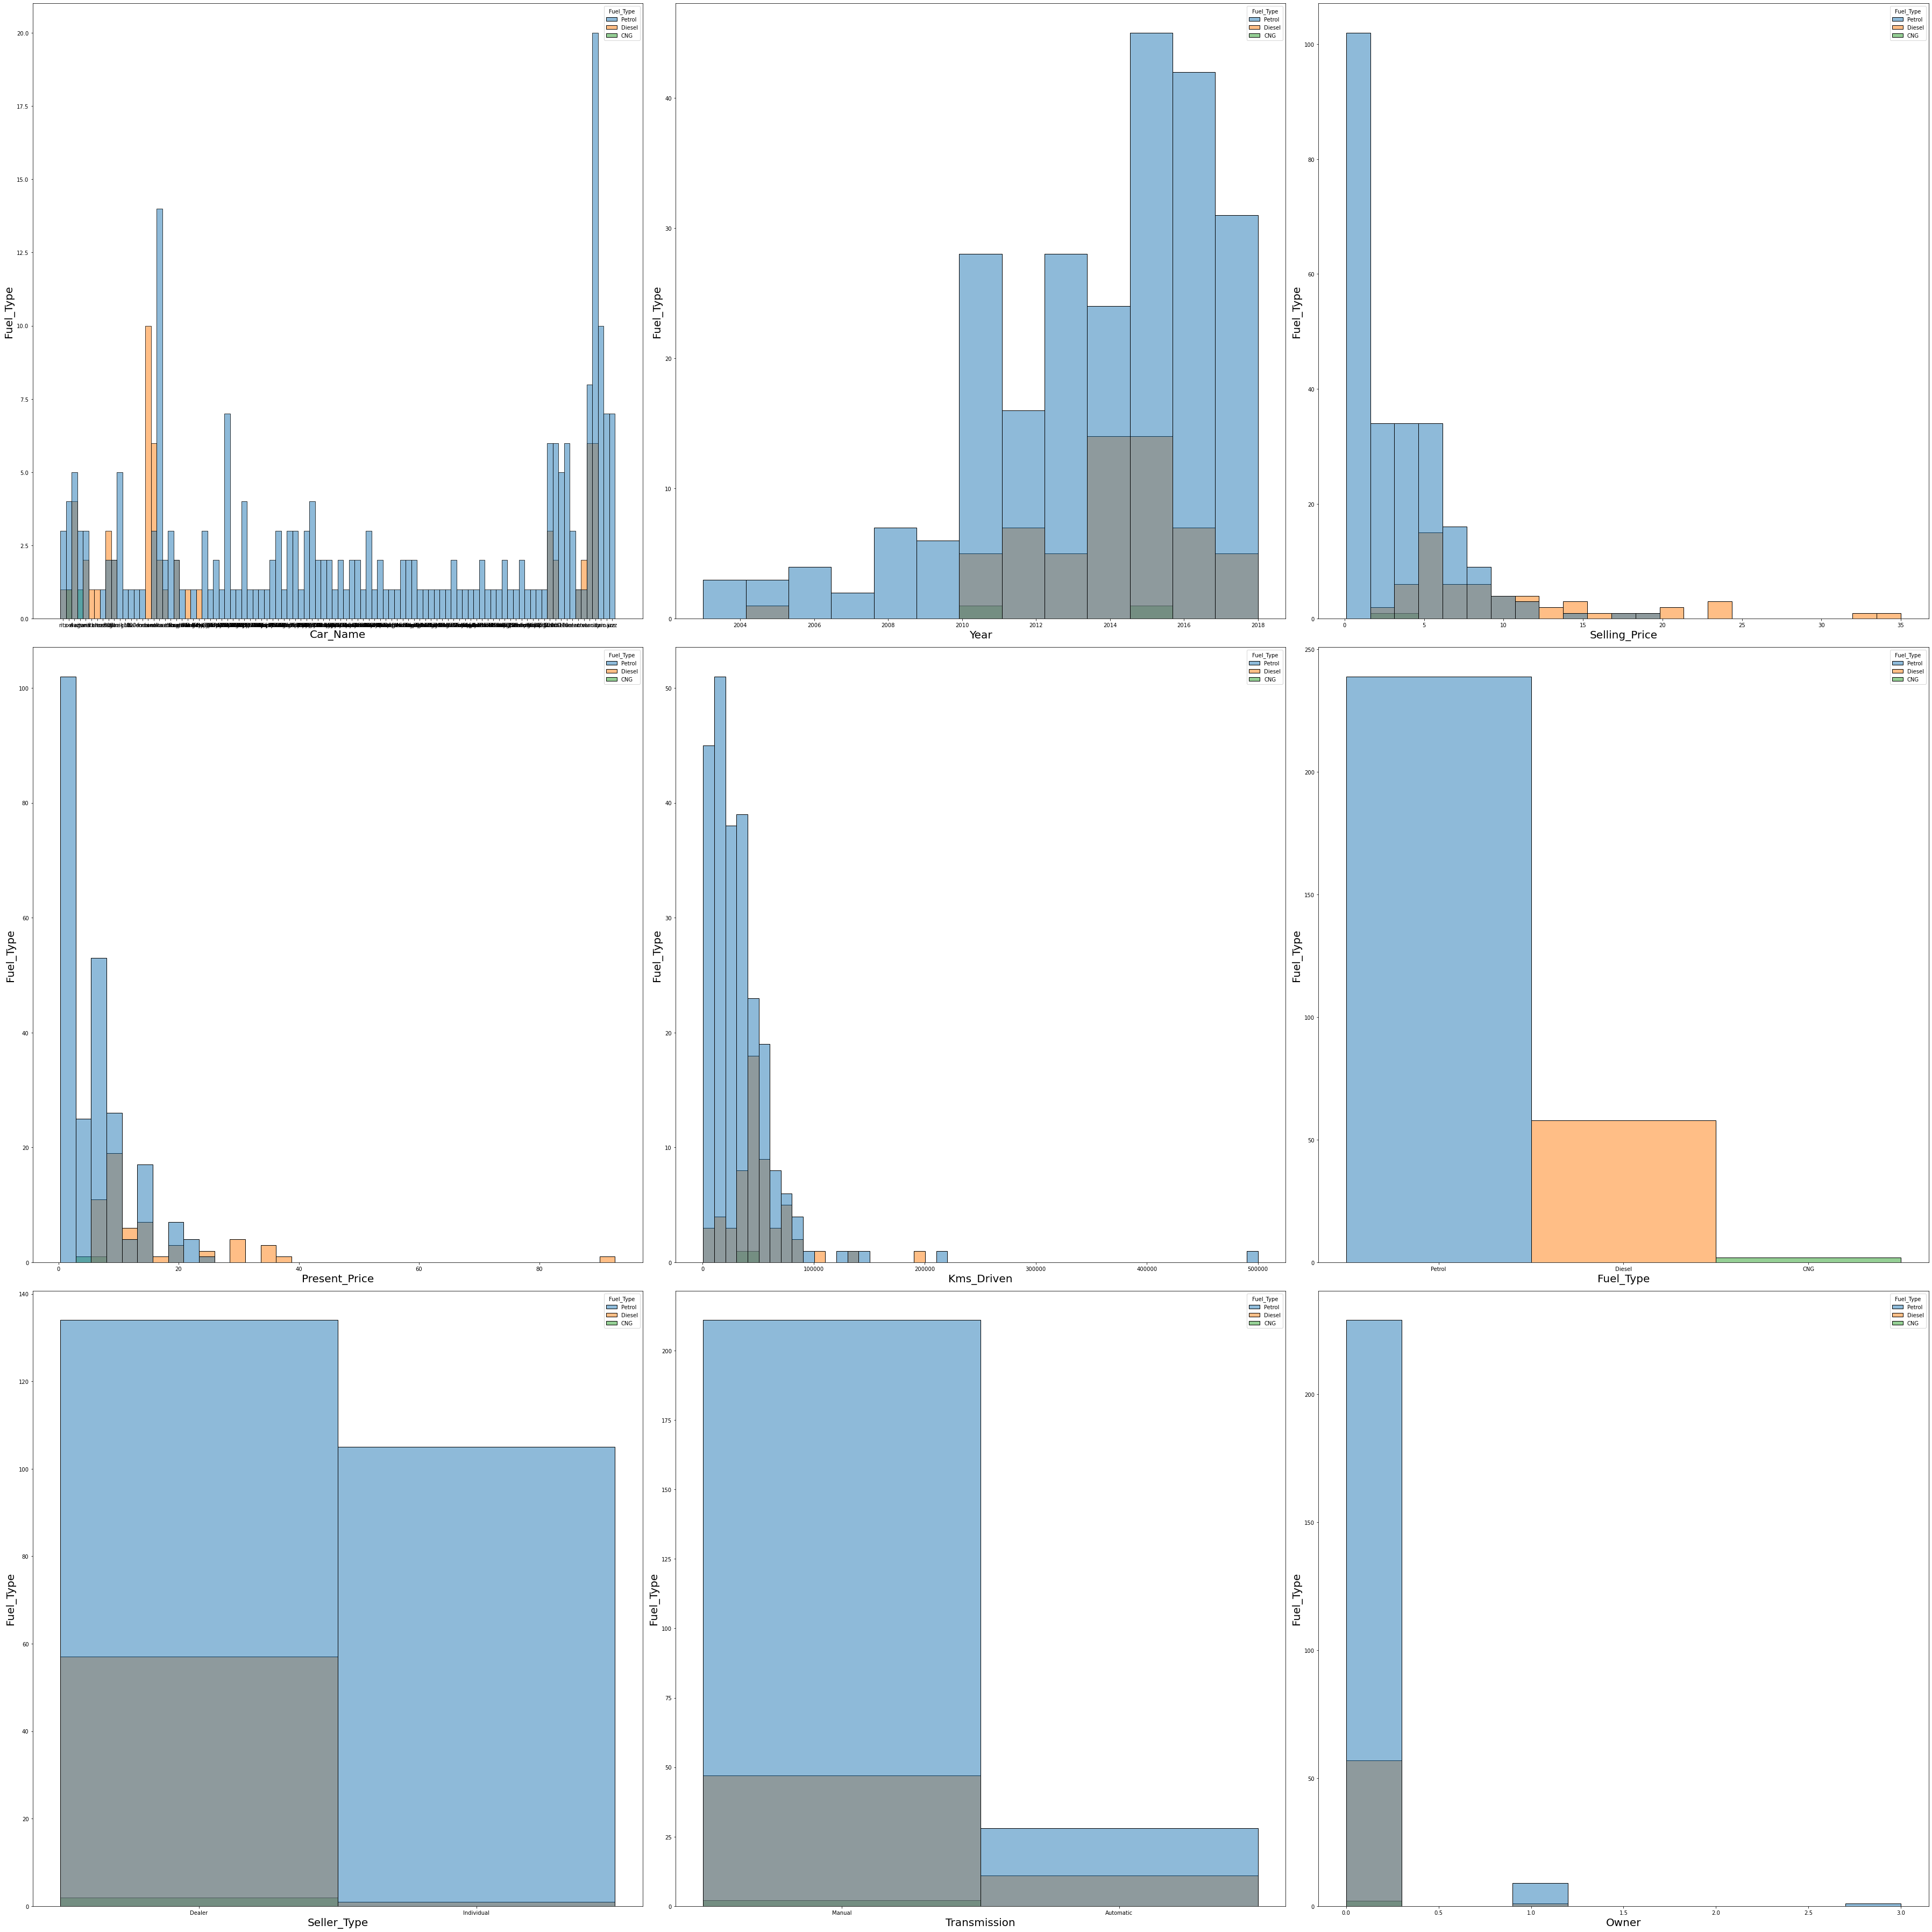

In [15]:
plt.figure(figsize=(50,50), facecolor='white') #canva size
plotnumber=1 

for column in data:
    if plotnumber<=10: #checking whether count variable is less than 16 or not
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0),hue=data.Fuel_Type)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Fuel_Type',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# 1.Seller_Type

In [16]:
data.Seller_Type = data.Seller_Type.map({'Dealer': 0, 'Individual' : 1})

In [17]:
data.Seller_Type

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Seller_Type, Length: 299, dtype: int64

# 2.Transmission 

In [18]:
data.Transmission= pd.get_dummies(data.Transmission,drop_first=True)

In [19]:
data.Transmission

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Transmission, Length: 299, dtype: uint8

# 3.Fuel Type 

In [20]:
data.Fuel_Type = data.Fuel_Type.map({'Petrol': 2, 'Diesel' : 1, 'CNG': 0})

In [21]:
data.Fuel_Type

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 299, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Seller_Type    299 non-null    int64  
 7   Transmission   299 non-null    uint8  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(5), object(1), uint8(1)
memory usage: 29.4+ KB


In [23]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.234369,-0.053563,-0.525714,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.234369,1.000000,0.876378,0.028566,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,-0.053563,0.876378,1.000000,0.205253,-0.431809,-0.511686,-0.334265,0.009947
Kms_Driven,-0.525714,0.028566,0.205253,1.000000,-0.167287,-0.101030,-0.163881,0.089367
Fuel_Type,-0.046210,-0.500292,-0.431809,-0.167287,1.000000,0.347922,0.068618,0.054174
Seller_Type,-0.036820,-0.553851,-0.511686,-0.101030,0.347922,1.000000,0.058669,0.123646
Transmission,0.003434,-0.348869,-0.334265,-0.163881,0.068618,0.058669,1.000000,-0.052166
Owner,-0.181639,-0.087880,0.009947,0.089367,0.054174,0.123646,-0.052166,1.000000


<AxesSubplot:>

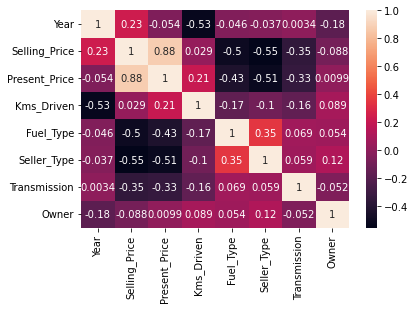

In [24]:
sns.heatmap(data.drop('Car_Name',axis = 1).corr(),annot=True)

In [25]:
#Model Creation 
x = data.drop(['Car_Name','Selling_Price'],axis = 1)
y = data.Selling_Price

In [26]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [27]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [29]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
78,2010,22.83,80000,2,0,0,0
59,2014,35.96,41000,1,0,0,0
14,2009,7.21,77427,2,0,1,0
148,2010,0.94,45000,2,1,1,0
183,2013,0.47,21000,2,1,1,0
...,...,...,...,...,...,...,...
279,2014,13.60,40126,2,0,1,0
258,2015,13.60,25000,2,0,1,0
133,2016,0.95,500,2,1,1,0
251,2013,9.90,56701,2,0,1,0


In [30]:
y_train

78      5.25
59     19.99
14      2.25
148     0.52
183     0.27
       ...  
279     6.25
258     8.40
133     0.72
251     5.00
154     0.50
Name: Selling_Price, Length: 239, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_predict = LR.predict(x_test)

In [33]:
y_test

85      2.50
219     4.50
213     2.90
287     5.75
32      4.95
136     0.65
203     2.95
249     5.25
16      7.25
179     0.31
26      4.15
111     1.15
243     6.25
84      3.49
68      4.35
117     1.10
265     6.50
229     3.10
156     0.48
62     18.75
66     19.75
230     6.15
198     0.15
120     1.05
165     0.45
217     3.15
79     14.50
105     1.35
215     4.50
5       9.25
297     4.00
202     4.40
104     1.35
39      2.25
227     2.55
285     7.40
182     0.30
242     4.40
168     0.42
128     0.80
144     0.60
110     1.20
298     3.35
205     5.25
134     0.65
132     0.75
48      5.80
6       6.75
129     0.78
252     5.40
67      9.25
75      3.95
83     12.50
212    11.25
71      4.50
47      1.05
155     0.48
38      3.00
3       2.85
74      4.90
Name: Selling_Price, dtype: float64

In [34]:
y_predict

array([ 9.6890866 ,  4.54610197,  2.99064098,  6.5368315 ,  6.20805902,
        0.94900365,  1.90583219,  5.55443254,  8.07765048, -1.83357738,
        3.30917762,  2.01185697,  5.6079501 ,  4.17010143,  5.76028162,
        1.73473404,  6.44361844,  4.97735786,  1.97057639, 20.17789425,
       14.48081116,  6.59451389, -0.25920097,  1.9218475 ,  3.22810561,
        4.16419753, 16.90359858,  1.90123565,  4.5455668 ,  9.14195809,
        4.14748188,  4.22928043,  2.44875016, -0.05039221,  1.81175778,
        7.55918631,  0.21468345,  4.40467616,  0.37730552,  2.18947522,
        0.84816937,  2.15004892,  3.69866259,  5.19539959,  2.11586358,
        2.22215426,  5.13004227,  5.34909453,  2.16551362,  6.30360235,
       10.1263874 ,  4.67366682,  9.27730453,  8.17570138,  7.10461174,
       -0.48246446,  3.62004404,  3.8944361 ,  1.96523654,  6.60897023])

In [36]:
#Evalution of Model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
r2_score = r2_score(y_test,y_predict)

In [37]:
r2_score

0.8256154348475127

In [38]:
x_test.shape

(60, 7)

In [40]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

3.015330522379998
1.7364707087595799


In [42]:
print(mean_absolute_error(y_test,y_predict))

1.191764282675747


In [44]:
adjusted_r2 = 1-(1-0.82)*(60-7)/(60-7-1)
adjusted_r2

0.8165384615384614